In [7]:
%load_ext autoreload
%autoreload 2

In [24]:
import utils_new.py as utils
import numpy as np
import pandas as pd
import sys
import os, psutil
import time 
import matplotlib.pyplot as plt

from optparse import OptionParser


nt = ['A', 'T', 'C', 'G']

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence (InputLayer)          [(None, 1048576, 4)  0           []                               
                                ]                                                                 
                                                                                                  
 stochastic_reverse_complement_  ((None, 1048576, 4)  0          ['sequence[0][0]']               
 1 (StochasticReverseComplement  , ())                                                            
 )                                                                                                
                                                                                                  
 stochastic_shift_1 (Stochastic  (None, 1048576, 4)  0           ['stochastic_reverse_comple

 re_lu_49 (ReLU)                (None, 8192, 96)     0           ['max_pooling1d_17[0][0]']       
                                                                                                  
 conv1d_35 (Conv1D)             (None, 8192, 96)     46080       ['re_lu_49[0][0]']               
                                                                                                  
 batch_normalization_48 (BatchN  (None, 8192, 96)    384         ['conv1d_35[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 max_pooling1d_18 (MaxPooling1D  (None, 4096, 96)    0           ['batch_normalization_48[0][0]'] 
 )                                                                                                
                                                                                                  
 re_lu_50 

 ormalization)                                                                                    
                                                                                                  
 re_lu_58 (ReLU)                (None, 512, 48)      0           ['batch_normalization_56[0][0]'] 
                                                                                                  
 conv1d_44 (Conv1D)             (None, 512, 96)      4608        ['re_lu_58[0][0]']               
                                                                                                  
 batch_normalization_57 (BatchN  (None, 512, 96)     384         ['conv1d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 dropout_16 (Dropout)           (None, 512, 96)      0           ['batch_normalization_57[0][0]'] 
          

 ormalization)                                                                                    
                                                                                                  
 dropout_20 (Dropout)           (None, 512, 96)      0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 add_20 (Add)                   (None, 512, 96)      0           ['add_19[0][0]',                 
                                                                  'dropout_20[0][0]']             
                                                                                                  
 re_lu_67 (ReLU)                (None, 512, 96)      0           ['add_20[0][0]']                 
                                                                                                  
 conv1d_53 (Conv1D)             (None, 512, 48)      13824       ['re_lu_67[0][0]']               
          

 conv2d_16 (Conv2D)             (None, 512, 512, 24  10368       ['re_lu_74[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_72 (BatchN  (None, 512, 512, 24  96         ['conv2d_16[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 re_lu_75 (ReLU)                (None, 512, 512, 24  0           ['batch_normalization_72[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 512, 512, 48  1152        ['re_lu_75[0][0]']               
          

                                                                                                  
 batch_normalization_78 (BatchN  (None, 512, 512, 24  96         ['conv2d_22[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 re_lu_81 (ReLU)                (None, 512, 512, 24  0           ['batch_normalization_78[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 512, 512, 48  1152        ['re_lu_81[0][0]']               
                                )                                                                 
                                                                                                  
 batch_nor

ModuleNotFoundError: No module named 'utils_new.py'; 'utils_new' is not a package

In [25]:
hg38_file = '/pollard/home/shzhang/akita/run_akita/refs/hg38.fa'
fasta_hg38 = pysam.Fastafile(hg38_file)

In [26]:
data_dir='/pollard/home/shzhang/akita/akdemir_collab/colab_fasta/'

In [41]:
walk_file=pd.read_csv(data_dir + '235890-WG01_walk_11_MDM2_containing.bed', sep='\t', header=None)


In [42]:
fa_file = open(data_dir + '235890-WG01_walk_11_MDM2_containing.fa', "r")
seq=fa_file.read()[2:]
print(seq[0:10])
file.close()

AGCTGGGTTC


In [43]:
CHR = 'chr'+'12'
POS = 58318339
END= POS+1048576



REF_seq = fasta_hg38.fetch(CHR, POS, END).upper()
ALT_seq=seq[0:1048576]
    
#this is where akita is actually rn
#output vector size is (99681,)
REF_vector, ALT_vector = utils.vector_from_seq(REF_seq), utils.vector_from_seq(ALT_seq)
    
REF_mat, ALT_mat = utils.mat_from_vector(REF_vector), utils.mat_from_vector(ALT_vector)

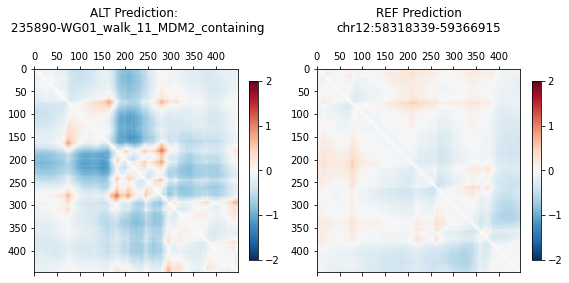

In [44]:
        
plt.figure(figsize=(8,4))
target_index = 0
vmin=-2; vmax=2



plt.subplot(121) 
im = plt.matshow(ALT_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title('ALT Prediction' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )
plt.title('ALT Prediction: \n 235890-WG01_walk_11_MDM2_containing',y=1.15 )

plt.subplot(122) 
im = plt.matshow(REF_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
plt.title('REF Prediction' + '\n' + '{}:{}-{}'.format(CHR, POS, END),y=1.15 )




plt.tight_layout()
#plt.show()
plt.savefig(data_dir + '235890-WG01_walk_11_MDM2_containing_pred.pdf', dpi=300)   # save the figure to file

In [ ]:
235874-WG01_walk_12_EGFR_containing.fa

In [45]:
fa_file = open(data_dir + '235874-WG01_walk_12_EGFR_containing.fa', "r")
seq=fa_file.read()[2:]
print(seq[0:10])
file.close()

walk_file=pd.read_csv(data_dir + '235874-WG01_walk_12_EGFR_containing.bed', sep='\t', header=None)
walk_file

ATTTTACTTA


,0,1,2,3,4,5
0,chr7,55281803,55592602,-,38,-289
1,chr7,55197803,55281802,-,42,-288
2,chr7,54851603,55197802,-,47,-287
3,chr7,54643403,54851602,-,43,-286
4,chr7,54415803,54643402,-,48,-285


In [46]:
CHR = 'chr'+'7'
POS = 55281803
END= POS+1048576



REF_seq = fasta_hg38.fetch(CHR, POS, END).upper()
ALT_seq=seq[0:1048576]
    
#this is where akita is actually rn
#output vector size is (99681,)
REF_vector, ALT_vector = utils.vector_from_seq(REF_seq), utils.vector_from_seq(ALT_seq)
    
REF_mat, ALT_mat = utils.mat_from_vector(REF_vector), utils.mat_from_vector(ALT_vector)

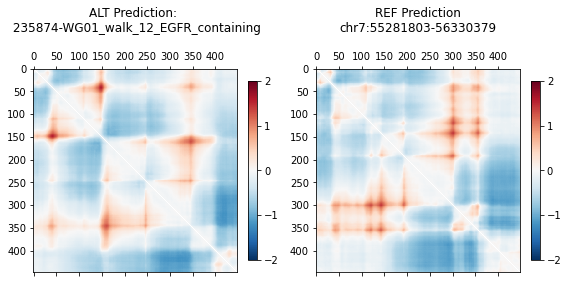

In [47]:
        
plt.figure(figsize=(8,4))
target_index = 0
vmin=-2; vmax=2



plt.subplot(121) 
im = plt.matshow(ALT_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title('ALT Prediction' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )
plt.title('ALT Prediction: \n 235874-WG01_walk_12_EGFR_containing',y=1.15 )

plt.subplot(122) 
im = plt.matshow(REF_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
plt.title('REF Prediction' + '\n' + '{}:{}-{}'.format(CHR, POS, END),y=1.15 )




plt.tight_layout()
#plt.show()
plt.savefig(data_dir + '235874-WG01_walk_12_EGFR_containing_pred.pdf', dpi=300)   # save the figure to file

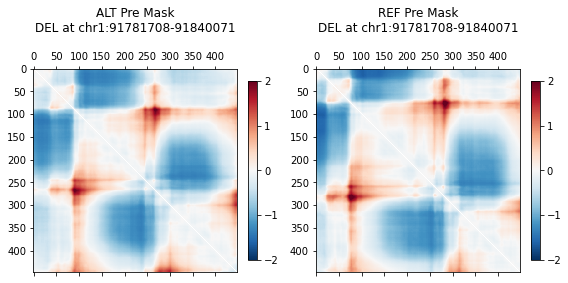

In [38]:
plt.figure(figsize=(8,4))
target_index = 0
vmin=-2; vmax=2


plt.subplot(121) 
im = plt.matshow(ALT_mat_before, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title( 'target-'+str(hic_num_to_name_dict[target_index]),y=1.15)
plt.title('ALT Pre Mask' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )

plt.subplot(122) 
im = plt.matshow(REF_mat_before, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title( 'target-'+str(hic_num_to_name_dict[target_index]),y=1.15)
plt.title('REF Pre Mask' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )



plt.tight_layout()
plt.savefig('/pollard/home/shzhang/akita/figs/del_mask_schematic_premask.pdf', dpi=300)   # save the figure to file



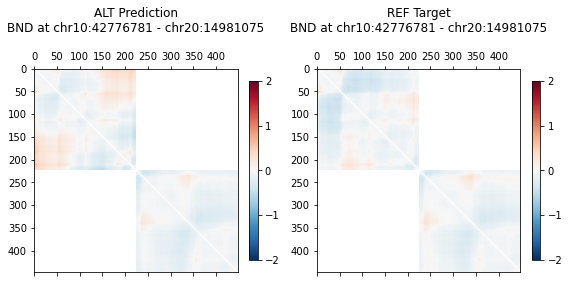

In [128]:
#THIS ONE FOR BND

plt.figure(figsize=(8,4))
target_index = 0
vmin=-2; vmax=2



plt.subplot(121) 
im = plt.matshow(REF_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
plt.title('ALT Prediction' + '\n' + '{} at {}:{} - chr{}:{}'.format(SVTYPE, CHR, POS, variant.CHROM_B, variant.END_B),y=1.15 )
#plt.title('pred test',y=1.15 )

#plt.ylabel(myseq_str)

# plot target 
plt.subplot(122) 
im = plt.matshow(ALT_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title( 'target-'+str(hic_num_to_name_dict[target_index]),y=1.15)
plt.title('REF Target' + '\n' + '{} at {}:{} - chr{}:{}'.format(SVTYPE, CHR, POS, variant.CHROM_B, variant.END_B),y=1.15 )


plt.tight_layout()
#plt.show()
plt.savefig('/pollard/home/shzhang/akita/figs/35c87b1a_bnd.pdf', dpi=300)   # save the figure to file

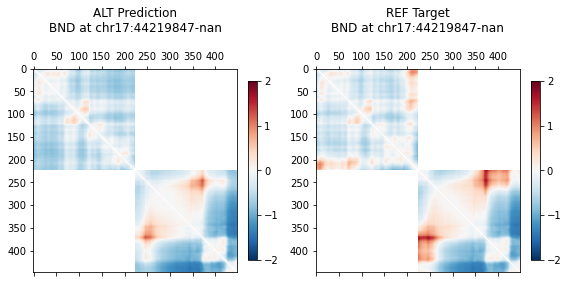

In [106]:
plt.figure(figsize=(8,4))
target_index = 0
vmin=-2; vmax=2



plt.subplot(121) 
im = plt.matshow(REF_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
plt.title('ALT Prediction' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )
#plt.title('pred test',y=1.15 )

#plt.ylabel(myseq_str)

# plot target 
plt.subplot(122) 
im = plt.matshow(ALT_mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
#plt.title( 'target-'+str(hic_num_to_name_dict[target_index]),y=1.15)
plt.title('REF Target' + '\n' + '{} at {}:{}-{}'.format(SVTYPE, CHR, POS, END),y=1.15 )


plt.tight_layout()
#plt.show()
plt.savefig('/pollard/home/shzhang/akita/figs/54d32c7c_bnd.pdf', dpi=300)   # save the figure to file

<Figure size 432x288 with 0 Axes>